In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing or loading the dataset
df = pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


Observations:
    
1) There are 5 independent variables or features available

2) Out of which rank, discipline and sex are catergorical type of feature

3) rank and discipline are ordinal type

4) Label or target is salary which has to be predicted and it is of numerical (continuous) type of data

5) Therefore we need to use regression method while building prediction model

In [3]:
#Checing data types
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [4]:
df.shape

(397, 6)

In [5]:
#Checking any null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
#Checing value counts of each category in catergorical type feature columns
print(df['rank'].value_counts(),'\n')
print(df['sex'].value_counts(),'\n')
print(df['discipline'].value_counts(),'\n')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64 

Male      358
Female     39
Name: sex, dtype: int64 

B    216
A    181
Name: discipline, dtype: int64 



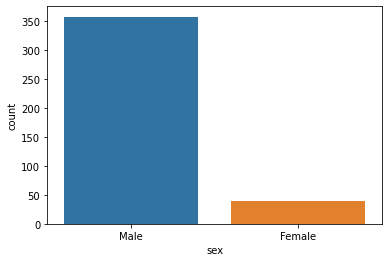

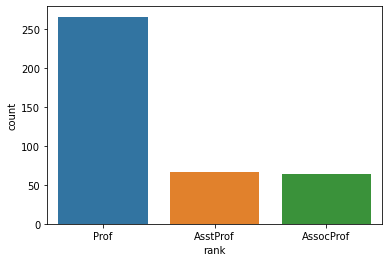

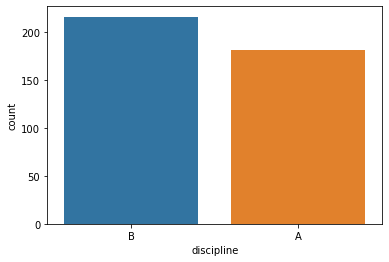

In [7]:
#Countplot for vizualization of value counts of categorical data
sns.countplot(df['sex'])
plt.show()

sns.countplot(df['rank'])
plt.show()

sns.countplot(df['discipline'])
plt.show()

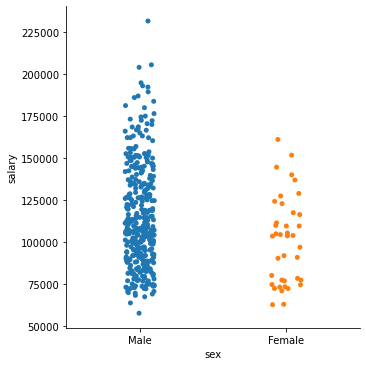

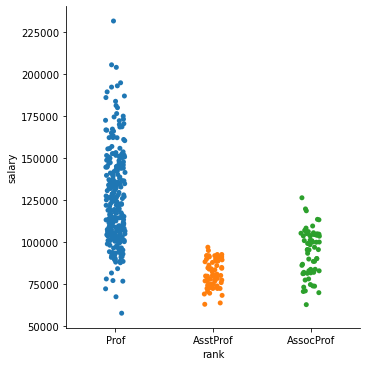

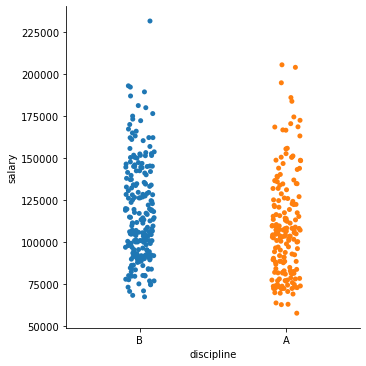

In [8]:
#Cat plot for vizualization of ordinal data wrt to salary
sns.catplot(x='sex',y='salary', data=df )
plt.show()

sns.catplot(x='rank',y='salary', data=df )
plt.show()

sns.catplot(x='discipline',y='salary', data=df )
plt.show()

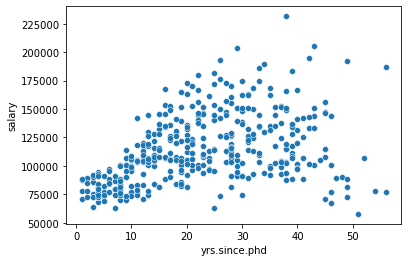

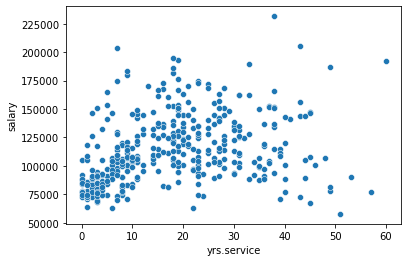

In [9]:
#Scatter plot to vizualize relationship with target variable
sns.scatterplot(x = df['yrs.since.phd'], y = df['salary'], data=df)
plt.show()

sns.scatterplot(x = df['yrs.service'], y = df['salary'], data=df)
plt.show()

We can observe some positive correlation from above graph

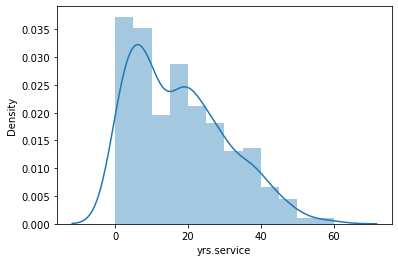

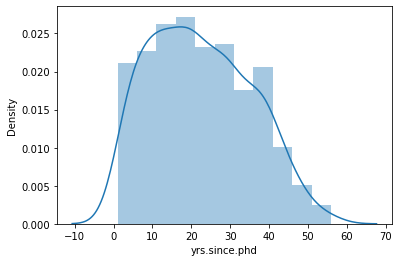

In [10]:
#Checing the distribution of data
sns.distplot(x = df['yrs.service'])
plt.xlabel('yrs.service')
plt.show()

sns.distplot(x = df['yrs.since.phd'])
plt.xlabel('yrs.since.phd')
plt.show()

The above distribtion plots shows that there is some skewness present in the data

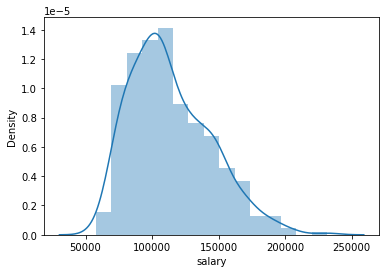

In [11]:
#Checing the distribution of target data
sns.distplot(x = df['salary'])
plt.xlabel('salary')
plt.show()

In [12]:
#Encoding the categorical / ordinal data
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


In [13]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [14]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


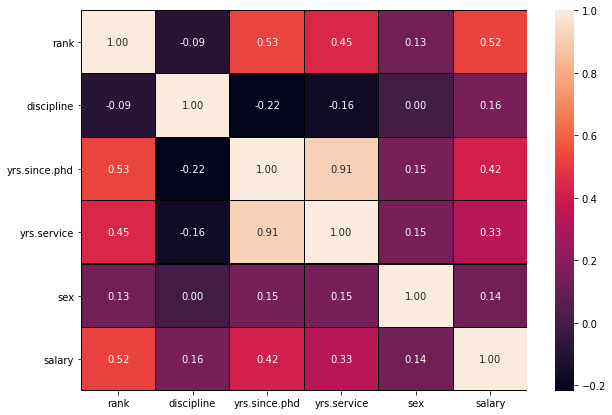

In [15]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

We observe there is strong correlation b/w yrs.service & yrs.since.phd of 0.91

Target salaries has +ve correlation of 0.52 & 0.42 with rank & yrs.since.phd respectively

Collinearity exists between independent variables yrs.service & yrs.since.phd

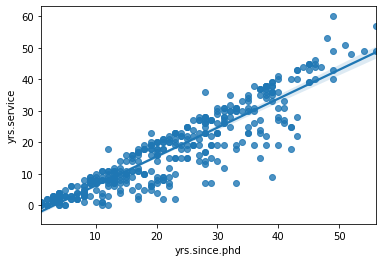

In [16]:
#regplot to vizualize collinearity
sns.regplot(x = df['yrs.since.phd'], y = df['yrs.service'], data=df)
plt.show()

We can observe a strong positive correlation here

In [17]:
#Sorting descending values of correlation data of target variable
df.corr()['salary'].sort_values(ascending=False)

salary           1.000000
rank             0.522207
yrs.since.phd    0.419231
yrs.service      0.334745
discipline       0.156084
sex              0.138610
Name: salary, dtype: float64

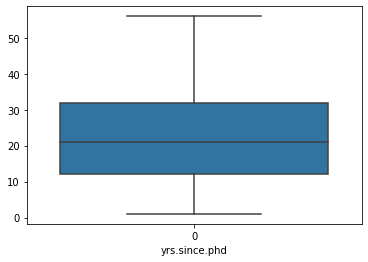

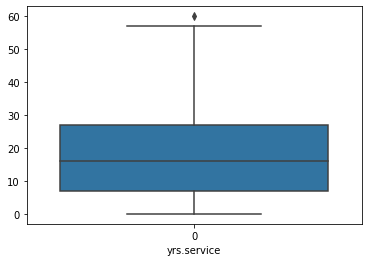

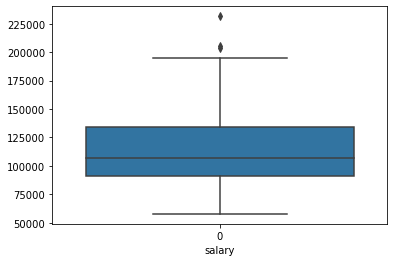

In [18]:
#Checking outliers in the data (continuous features only)
sns.boxplot(data= df['yrs.since.phd'])
plt.xlabel('yrs.since.phd')
plt.show()

sns.boxplot(data= df['yrs.service'])
plt.xlabel('yrs.service')
plt.show()

sns.boxplot(data= df['salary'])
plt.xlabel('salary')
plt.show()

column yrs.service has outlier

Note: For target variable and categorical features outlier removal is not required

In [19]:
from scipy.stats import zscore

print('Data size before',df.shape)

z = pd.DataFrame(np.abs(zscore(df[['yrs.since.phd','yrs.service']])<3))
df_new = df[(z<3).all(axis=1)]

print('Data size after',df_new.shape)

Data size before (397, 6)
Data size after (397, 6)


3 sigma rule satisfied without loss of any data, this means no outliers present in continuous feature columns

In [20]:
#Seperate feature and target columns
x = df_new.drop(columns=['salary'])
y = df_new['salary']

In [21]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[6.53440994043582,
 2.0201118596447682,
 24.949894801922756,
 16.236005972576294,
 5.502355097116202]

Feature columns 'yrs.since.phd','yrs.service' has high VIF value indicating high multicollinearity

This can be resolved by dimensionality reduction

Let us drop one of these highly correlated columns

In [22]:
x = x.drop(['yrs.service'], axis=1)

In [23]:
vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[6.401453052508828, 2.01893905080776, 5.570743820975515, 5.4463459826981095]

Now VIF value is within allowable limit of 10

In [24]:
#Checking for skewness of continuous data coulmns present in features
x[['yrs.since.phd']].skew()

yrs.since.phd    0.30088
dtype: float64

skewness of continuous data column of feature is within range +-0.5 so no need to remove skewness

In [25]:
#scaling of input feature data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

Need to apply transformation technique to remove skewness

In [37]:
# Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,1) == round(r2_score(yt,predyt)*100,1):
             print('At RS',i,'Model preforms well')
             print('Test score =',(r2_score(yt,predyt)*100),'\n')

At RS 210 Model preforms well
Test score = 36.17550447751911 

At RS 277 Model preforms well
Test score = 36.03723850186663 

At RS 310 Model preforms well
Test score = 35.78651380174742 

At RS 315 Model preforms well
Test score = 35.93059491598556 

At RS 358 Model preforms well
Test score = 35.470311394300516 

At RS 494 Model preforms well
Test score = 35.83784665447508 

At RS 681 Model preforms well
Test score = 36.128544409555374 

At RS 866 Model preforms well
Test score = 36.01407613934096 



In [38]:
xtr, xt, ytr, yt = train_test_split(x,y, random_state=210,test_size=0.2)
lr.fit(xtr,ytr)
predytr = lr.predict(xtr)
predyt = lr.predict(xt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.36175504477519116 

Mean absolute error = 18344.615973294363 

Mean squared error = 521143265.9329613 



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

ls = Lasso()

parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 'random_state':list(range(0,20))}

gsv = GridSearchCV(ls, parameters)

gsv.fit(xtr,ytr)

print(gsv.best_estimator_)

Lasso(alpha=10, random_state=0)


In [39]:
ls = Lasso(alpha=10, random_state=0)

ls.fit(xtr,ytr)

predyt = ls.predict(xt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.3618287250227359 

Mean absolute error = 18344.768710938297 

Mean squared error = 521083104.1337557 



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

parameters = {'n_estimators':[50,100,150,200], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'max_features' : ["auto", "sqrt", "log2"]}

gsv = GridSearchCV(rf, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='log2', n_estimators=150)


In [40]:
rf = RandomForestRegressor(max_depth=4, max_features='log2', n_estimators=100)

rf.fit(xtr,ytr)

predyt = rf.predict(xt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.5186349481468373 

Mean absolute error = 15154.685220726376 

Mean squared error = 393046828.1420039 



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters = {'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'], 
              'n_estimators':[50,100,150,200], 
              'max_depth' : [3,4,5,6,7]}

gsv = GridSearchCV(gbr, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='squared_error', n_estimators=50)


In [41]:
gbr = GradientBoostingRegressor(n_estimators=50)

gbr.fit(xtr,ytr)

predyt = gbr.predict(xt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.45650109657937565 

Mean absolute error = 16086.208990818763 

Mean squared error = 443780700.87501353 



Random forest regressor is giving best results based on R2 score, MSE and MAE values


Let us check its CV score to check overfitting

In [48]:
from sklearn.model_selection import cross_val_score

predyt = rf.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(rf,x,y,cv=6)
lsc = lsc.mean()
print('At CV =',6)
print('CV score =',lsc)
print('r2_score =',lss)

At CV = 6
CV score = 0.4424948341195705
r2_score = 0.5186349481468373


In [35]:
import pickle
filename='salary.pkl'
pickle.dump(ls,open(filename,'wb'))